In [9]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
import scipy.stats as stats
#
from supports._setting import aiport_trips_dir
from supports._setting import MINUTE
from supports.charts import histo_cumulative, x_twin_chart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
Y09 = pd.read_csv('%s/%s'%(aiport_trips_dir, 'Y09-airport-trip.csv'))
Y10 = pd.read_csv('%s/%s'%(aiport_trips_dir, 'Y10-airport-trip.csv'))

Ttest_indResult(statistic=288.03195639095867, pvalue=0.0)


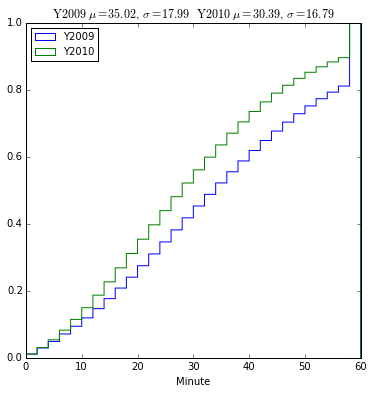

In [11]:
x1 = [ x / MINUTE for x in Y09['queue-time']]
x2 = [ x / MINUTE for x in Y10['queue-time']]

print stats.ttest_ind(x1, x2, equal_var = False)
histo_cumulative('', 'Minute', '', 30, [x1, x2], ['Y2009', 'Y2010'], save_fn='cum_histo_qt')

In [12]:
from supports._setting import DInAP_PInAP, DOutAP_PInAP
from supports._setting import TIME_SLOTS

Y09_prev_in = Y09[Y09['trip-mode'] == DInAP_PInAP]
Y09_prev_out = Y09[Y09['trip-mode'] == DOutAP_PInAP]
Y10_prev_in = Y10[Y10['trip-mode'] == DInAP_PInAP]
Y10_prev_out = Y10[Y10['trip-mode'] == DOutAP_PInAP]
#
Y09_in_hourly_gb, Y10_in_hourly_gb = Y09_prev_in.groupby(['hh']), Y10_prev_in.groupby(['hh'])
Y09_out_hourly_gb, Y10_out_hourly_gb = Y09_prev_out.groupby(['hh']), Y10_prev_out.groupby(['hh'])
#
Y09_in_hourly_qt = [ x / MINUTE for x in Y09_in_hourly_gb.mean()['queue-time']]
Y10_in_hourly_qt = [ x / MINUTE for x in Y10_in_hourly_gb.mean()['queue-time']]
in_diff = [Y09_in_hourly_qt[i] - Y10_in_hourly_qt[i] for i in xrange(len(Y09_in_hourly_qt))]
Y09_in_hourly_num = [ x for x in Y09_in_hourly_gb.count()['queue-time']]
Y10_in_hourly_num = [ x for x in Y10_in_hourly_gb.count()['queue-time']]
in_num = [Y10_in_hourly_num[i] + Y09_in_hourly_num[i] for i in xrange(len(Y09_in_hourly_num))]
#
Y09_out_hourly_qt = [ x / MINUTE for x in Y09_out_hourly_gb.mean()['queue-time']]
Y10_out_hourly_qt = [ x / MINUTE for x in Y10_out_hourly_gb.mean()['queue-time']]
out_diff = [Y09_out_hourly_qt[i] - Y10_out_hourly_qt[i] for i in xrange(len(Y09_out_hourly_qt))]
Y09_out_hourly_num = [ x for x in Y09_out_hourly_gb.count()['queue-time']]
Y10_out_hourly_num = [ x for x in Y10_out_hourly_gb.count()['queue-time']]
out_num = [Y10_out_hourly_num[i] + Y09_out_hourly_num[i] for i in xrange(len(Y09_out_hourly_num))]

Ttest_relResult(statistic=7.7071092576759153, pvalue=8.0846277766523531e-08)


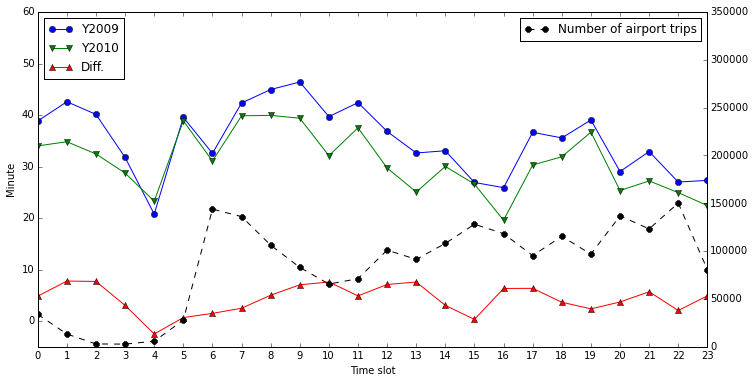

In [13]:
x_info = ('Time slot', TIME_SLOTS, 0)
y_info1 = ('Minute', [Y09_in_hourly_qt, Y10_in_hourly_qt, in_diff], (-5, 60), ['Y2009', 'Y2010', 'Diff.'], 'upper left')
y_info2 = ('', [in_num], (0, 350000), ['Number of airport trips'], 'upper right') 

print stats.ttest_rel(Y09_in_hourly_qt, Y10_in_hourly_qt)

x_twin_chart((12, 6), '', x_info, y_info1, y_info2, 'time_slot_queue_time_in_ap')

Ttest_relResult(statistic=10.395472415679295, pvalue=3.6590637300789707e-10)


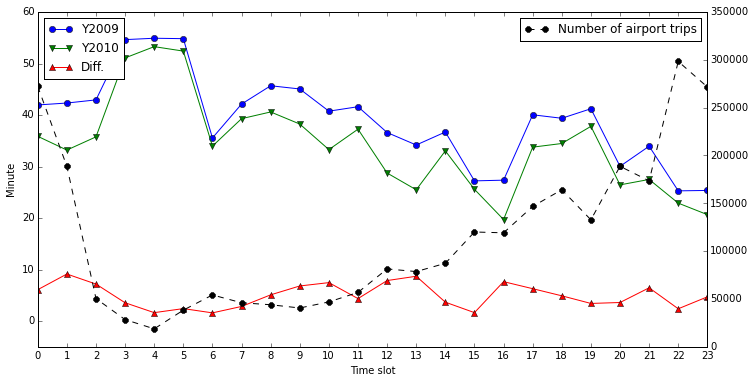

In [14]:
x_info = ('Time slot', TIME_SLOTS, 0)
y_info1 = ('Minute', [Y09_out_hourly_qt, Y10_out_hourly_qt, out_diff], (-5, 60), ['Y2009', 'Y2010', 'Diff.'], 'upper left')
y_info2 = ('', [out_num], (0, 350000), ['Number of airport trips'], 'upper right') 

print stats.ttest_rel(Y09_out_hourly_qt, Y10_out_hourly_qt)

x_twin_chart((12, 6), '', x_info, y_info1, y_info2, 'time_slot_queue_time_out_ap')